# Regressão 01 - tarefa 01

### 1. Explorando a base de gorjetas

a. Na aula fizemos uma regressão de ```tip``` explicada por ```net_bill```. Carregue os pacotes e a base, crie as variáveis necessárias como na aula, e reproduza esta regressão.

b. Reproduza também o gráfico de dispersão dessas duas variáveis.

In [17]:
import pandas as pd
import seaborn as sns
from seaborn import load_dataset
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.formula.api as smf

In [18]:

tips = sns.load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


In [19]:
# regressão
reg_tip = smf.ols('tip ~ net_bill', data = tips).fit()

<Axes: xlabel='net_bill', ylabel='tip'>

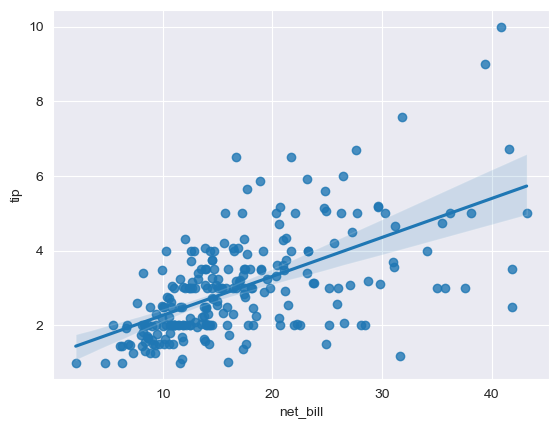

In [20]:
# gráfico de dispersão
sns.regplot(y = 'tip', x = 'net_bill', data = tips[tips['tip_pct']<.5])

### 2. Mudança de perspectiva

Agora ajuste um modelo de regressão de ```tip_pct``` por ```net_bill```. Construa o gráfico de dispersão correspondente.

In [21]:
# regressão
reg_tip_pct = smf.ols('tip_pct ~ net_bill', data = tips).fit()

<Axes: xlabel='net_bill', ylabel='tip_pct'>

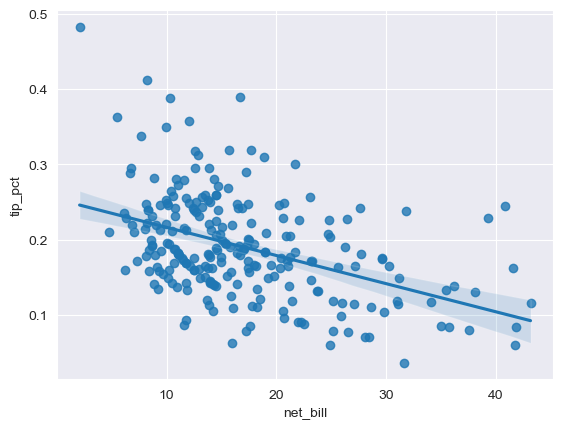

In [22]:
# gráfico de dispersão
sns.regplot(y = 'tip_pct', x = 'net_bill', data = tips[tips['tip_pct']<.5])

### 3. Comente

Compare os dois gráficos e comente (de forma objetiva e suscinta) a relação entre eles e a diferença do ajuste. Podemos comparar diretamente os $R^2$s?

In [23]:
# Podemos ver que o tamanho da gorjeta aumenta com o valor da conta, mas a taxa de gorjeta diminui.

### 4. Ajuste do modelo em outra escala

Com o modelo no item 3, obtenha a preditiva do valor da gorjeta:
  1. obtenha o valor predito ```pred``` para ```tip_pct``` (dica, veja o atributo ```reg.fittedvalues```)
  2. obtenha o valor predito para ```tip``` como ```tip_pct * net_bill```
  3. calcule o $R^2$ do modelo para ```tip```
  4. compare esse $R^2$ com o do item 1

In [29]:
# 1.obtenha o valor predito ```pred``` para ```tip_pct``` (dica, veja o atributo ```reg.fittedvalues```)
pred = reg_tip_pct.fittedvalues

# 2. obtenha o valor predito para ```tip``` como ```tip_pct * net_bill```
tips['pred_tip'] = pred * tips['net_bill']

# 3. calcule o $R^2$ do modelo tip perentage para ```tip```
reg_tip_pct = smf.ols('tip ~ pred_tip', data = tips).fit()
R2_tip = reg_tip_pct.rsquared
R2_tip

0.12112385704528739

In [31]:
# 4. compare esse $R^2$ com o do item 1
print(f"R2 tip: {reg_tip_pct.rsquared}")
print(f"R2 tip_pct: {reg_tip.rsquared}")

R2 tip: 0.12112385704528739
R2 tip_pct: 0.3325407312323707


Podemos ver que o $R^2$ do modelo de tip é maior que o do modelo de tip_pct.